In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Thay đổi đường dẫn của tệp CSV thành đường dẫn thực tế của bạn
file_path = 'D:/Study/Ma_Nguon_mo/bai_cuoi_ki/data_label_done.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị dữ liệu trong DataFrame
df.head()

In [3]:
# Separate features (X) and labels (y)
X = df.drop(['Neighborhood', 'SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

<AxesSubplot:>

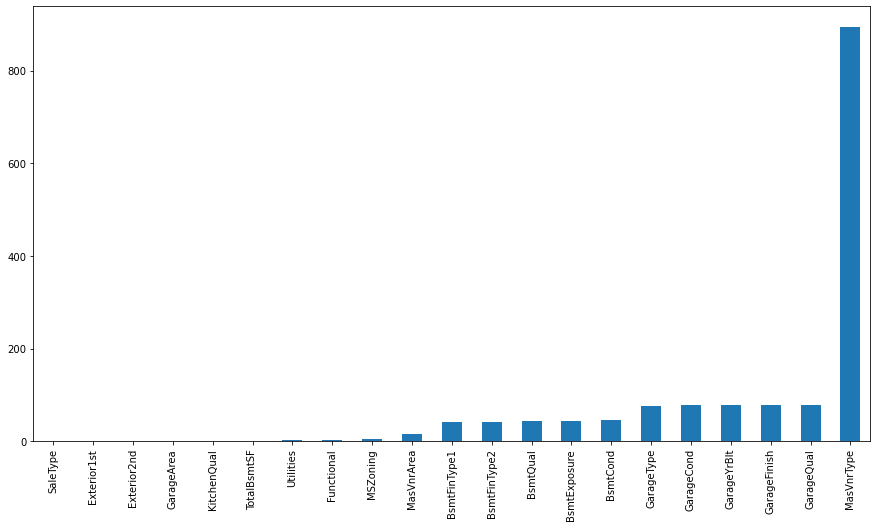

In [4]:
def mixup(X, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    mixup_image = lam * X + (1 - lam) * X[::-1]
    mixup_label = lam * y + (1 - lam) * y[::-1]
    return mixup_image, mixup_label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Áp dụng hàm mixup cho tập huấn luyện
X_train_mixup, y_train_mixup = mixup(X_train, y_train)

In [6]:
# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train_mixup, y_train_mixup)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [7]:
# Điền giá trị trung bình cho tất cả các cột kiểu chữ trong DataFrame
df[columns_to_fill].fillna(df.mode().iloc[0], inplace=True)

C:\Users\lamta\AppData\Local\Temp/ipykernel_10124/372054287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_fill].fillna(df.mode().iloc[0], inplace=True)


In [8]:
# Sử dụng get_dummies để thực hiện One-Hot Encoding cho tất cả các cột
df= pd.get_dummies(df,columns=[
    'MSZoning', 'Street',
    'LotConfig', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation',
    'Heating', 'CentralAir', 'Electrical',
    'GarageType','PavedDrive', 'SaleType', 'SaleCondition'
], drop_first=True)

In [9]:
# Áp dụng Label Encoding cho các cột cần thiết thủ công
label_mapping_lot_shape = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
label_mapping_land_contour = {'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0}
label_mapping_utilities = {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0, 'NA': -1}
label_mapping_land_slope = {'Gtl': 2, 'Mod': 1, 'Sev': 0}
label_mapping_exter_qual = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
label_mapping_exter_cond = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
label_mapping_bsmt_qual = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1}
label_mapping_bsmt_cond = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1}
label_mapping_bsmt_exposure = {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA': -1}
label_mapping_bsmt_fin_type1 = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': -1}
label_mapping_bsmt_fin_type2 = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': -1}
label_mapping_heating_qc = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
label_mapping_kitchen_qual = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1}
label_mapping_functional = {'Typ': 5, 'Min1': 4, 'Min2': 3, 'Mod': 2, 'Maj1': 1, 'Maj2': 0, 'Sev': -1, 'Sal': -2, 'NA': -1}
label_mapping_garage_finish = {'Fin': 2, 'RFn': 1, 'Unf': 0, 'NA': -1}
label_mapping_garage_qual = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1}
label_mapping_garage_cond = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1}

df['LotShape'] = df['LotShape'].map(label_mapping_lot_shape)
df['LandContour'] = df['LandContour'].map(label_mapping_land_contour)
df['Utilities'] = df['Utilities'].map(label_mapping_utilities)
df['LandSlope'] = df['LandSlope'].map(label_mapping_land_slope)
df['ExterQual'] = df['ExterQual'].map(label_mapping_exter_qual)
df['ExterCond'] = df['ExterCond'].map(label_mapping_exter_cond)
df['BsmtQual'] = df['BsmtQual'].map(label_mapping_bsmt_qual)
df['BsmtCond'] = df['BsmtCond'].map(label_mapping_bsmt_cond)
df['BsmtExposure'] = df['BsmtExposure'].map(label_mapping_bsmt_exposure)
df['BsmtFinType1'] = df['BsmtFinType1'].map(label_mapping_bsmt_fin_type1)
df['BsmtFinType2'] = df['BsmtFinType2'].map(label_mapping_bsmt_fin_type2)
df['HeatingQC'] = df['HeatingQC'].map(label_mapping_heating_qc)
df['KitchenQual'] = df['KitchenQual'].map(label_mapping_kitchen_qual)
df['Functional'] = df['Functional'].map(label_mapping_functional)
df['GarageFinish'] = df['GarageFinish'].map(label_mapping_garage_finish)
df['GarageQual'] = df['GarageQual'].map(label_mapping_garage_qual)
df['GarageCond'] = df['GarageCond'].map(label_mapping_garage_cond)

In [10]:
# Separate features (X) and labels (y)
X = df.drop(['Neighborhood'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Đọc mô hình từ tệp
loaded_model = joblib.load('gradient_boosting_model.pkl')

# # Sử dụng mô hình đã đọc để đưa ra dự đoán
# loaded_predictions = loaded_model.predict(X)

In [12]:
# Make predictions on the test set
y_pred = loaded_model.predict(X)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Exterior1st_NA
- Exterior2nd_NA
- MSZoning_NA
- SaleType_NA
Feature names seen at fit time, yet now missing:
- Condition2_RRAe
- Condition2_RRAn
- Condition2_RRNn
- Electrical_Mix
- Electrical_NA
- ...


In [ ]:
# Tạo DataFrame từ kết quả dự đoán và gán tên cột là 'Predicted'
predictions_df = pd.DataFrame({'Predicted': y_pred})

# Hiển thị và lưu DataFrame
print(predictions_df)

In [ ]:
# # Tạo DataFrame từ kết quả dự đoán và gán tên cột là 'Predicted'
# predictions_df = pd.DataFrame({'Predicted': loaded_predictions})

# # Hiển thị và lưu DataFrame
# print(predictions_df)
